In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

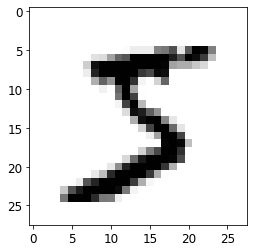

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.show()

In [7]:
target_some_digit = y[0]
target_some_digit

'5'

In [8]:
import numpy as np
y = y.astype(np.uint8)

In [9]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [10]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

In [23]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images=[]
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        print(row)
        row_images.append(np.concatenate(rimages, axis=1))
        
    image = np.concatenate(row_iamges, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")
    


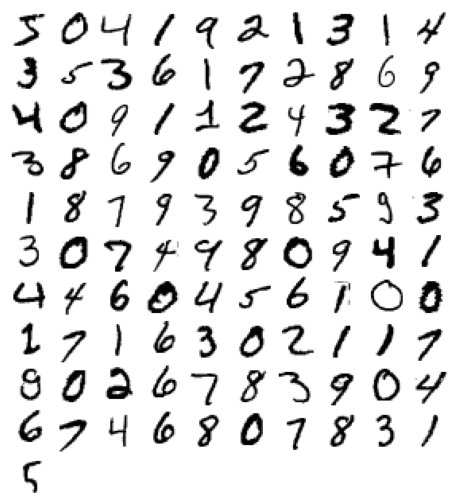

In [25]:
plt.figure(figsize=(9,9))
example_images = X[:101]
plot_digits2(example_images, images_per_row=10)
plt.show()

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [28]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [29]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [33]:
from sklearn.linear_model import SGDClassifier

sdg_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=101)
sdg_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=101)

In [34]:
sdg_clf.predict([some_digit])

array([ True])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sdg_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96945, 0.96725, 0.9511 ])

In [38]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [39]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [40]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sdg_clf, X_train, y_train_5, cv=3)

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54238,   341],
       [ 1903,  3518]])

In [42]:
from sklearn.metrics import precision_score, recall_score

In [43]:
precision_score(y_train_5, y_train_pred)

0.9116351386369526

In [44]:
recall_score(y_train_5, y_train_pred)

0.648957756871426

In [45]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7581896551724139

In [51]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve

forest_clf = RandomForestClassifier(n_estimators=100, random_state=101)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5
                                                      ,y_scores_forest)

y_scores = cross_val_predict(sdg_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)

plt.show()




In [52]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])

svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [53]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [54]:
np.argmax(some_digit_scores)

5

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sdg_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Users/bujarbakiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.89925, 0.8939 , 0.90555])

In [56]:
y_train_pred = cross_val_predict(sdg_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Users/bujarbakiu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5586,    0,   22,    6,    9,   44,   35,    6,  214,    1],
       [   0, 6404,   36,   25,    4,   45,    4,    8,  204,   12],
       [  27,   29, 5240,  100,   72,   27,   64,   38,  351,   10],
       [  24,   17,  118, 5252,    2,  210,   25,   40,  371,   72],
       [  12,   14,   48,   12, 5206,   12,   34,   26,  308,  170],
       [  28,   15,   30,  172,   52, 4475,   73,   16,  497,   63],
       [  29,   16,   44,    3,   43,   96, 5553,    5,  128,    1],
       [  21,   10,   53,   31,   50,   13,    3, 5706,  171,  207],
       [  18,   65,   45,   91,    3,  128,   24,   11, 5421,   45],
       [  25,   18,   30,   67,  119,   36,    1,  180,  342, 5131]])